#DATA 606 FINAL PROJECT

DATA SOURCE: https://www.kaggle.com/code/code1110/houseprice-data-cleaning-visualization/input

# Introduction

In an era where the real estate market is more dynamic than ever, accurately predicting the selling price of houses has become crucial. The real estate sector is a significant pillar of the economy, influencing both individual financial stability and broader economic trends. The task of accurately determining house prices is a complex challenge, influenced by a multitude of factors ranging from market conditions to individual property features. This complexity makes it an ideal candidate for the application of advanced analytical techniques.

The goal of our project is to develop a dependable and effective model for forecasting the selling prices of houses. This effort aims to enhance transparency and efficiency in real estate transactions. Our approach involves leveraging logistic regression analysis to analyze vast datasets encompassing various aspects like location, property size, amenities, economic indicators, and historical price trends. By doing so, we aim to capture the nuanced interplay of factors that drive housing prices.


#Purpose

The overall objective of this project is to create a predictive model that can accurately predict the sale prices of houses. The importance of this model's predictions can serve multiple stakeholders in the real estate ecosystem, including buyers, sellers, and other real estate investors by providing them with valuable insights into property valuation. For homeowners and sellers, an accurate prediction model helps in setting competitive and fair prices for their properties. The prediction model will be created using various statistical approaches particularly focused on the Random forest regressor and Decision tree regressor approaches, in addition to Linear regression.

#Methodology

The project begins with data collection and preprocessing, encompassing data wrangling techniques to clean and format the housing dataset.

# Pre-Processing: Data Cleaning

In [ ]:
#Import Libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import  plot_tree
from sklearn.metrics import mean_squared_error,r2_score



In [ ]:
#Import DataSet
train_data=pd.read_csv("https://drive.google.com/uc?export=download&id=1kBAI8grh4RZ52ACSTldeoGceySuYyOmv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Check for missing values in each columns by calculating the percentage
missing_train=train_data.isnull().mean()*100

#Filter the columns with missing values
missing_values_train=missing_train[missing_train>0].sort_values(ascending=False)

print("Missing values Train Dataset:")
print(missing_values_train)

Missing values Train Dataset:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


The percentage is high for some of the columns because there are alot of categorical columns that have "NA" values, which signifies "None". Python reads these "NA" values as missing values. In order to retain the valuable information from the categorical variables, we replace the "NA" values with "None" without losing any information from the original data.

In [ ]:
#Identify categorical columns by checking the datatypes
category_columns_train=train_data.select_dtypes(include=["object"]).columns

#Find the Categorical columns with any missing values
category_missing_train=[col for col in category_columns_train if train_data[col].isnull().any()]

#Replace "NA" with "None"
#This is done because pandas read "NA" as missing values when in context with this data is not applicable.
for col in set(category_missing_train):
  train_data[col].fillna("None", inplace=True)

#Check to verify that the missing values "NA" are replaced by "None"
missing_values_replaced_train=train_data[category_missing_train].isnull().sum().sum()

missing_values_replaced_train

0

We have repalced the "NA" values with "None" and verified the results above. We now proceed towards filling the missing values for numerical columns. It is important to note that in some columns, like "GarageArea", a 0 represents that the particular house does not have a Garage. But python reads this as a missing values. So it is important to take proper steps like "Imputation" to retain the most infromation from the dataset.

In [ ]:
#Check for numerical columns in the dataset
numerical_columns_train=train_data.select_dtypes(include=["int64","float64"]).columns

#Find the Numerical columns with any missing values
numerical_missing_train=train_data[numerical_columns_train].isnull().sum()[train_data[numerical_columns_train].isnull().sum()>0]

numerical_missing_train

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Use of Ratio Estimation to fill the null values for "LotFrontage" column in both train and test datasets.

In [ ]:
# Using Ratio Estimation (RE) for "LotFrontage" based on column "LotArea" for "training" dataset
known_lot_frontage_train=train_data.loc[train_data["LotFrontage"].notnull(),"LotFrontage"]
known_lot_area_train=train_data.loc[train_data["LotFrontage"].notnull(),"LotArea"]
mean_ratio_train=(known_lot_frontage_train/known_lot_area_train).mean()

#Estimate missing LotFrontage values for the "training" dataset
missing_lot_frontage_train=train_data["LotFrontage"].isnull()
train_data.loc[missing_lot_frontage_train,"LotFrontage"]=train_data.loc[missing_lot_frontage_train, "LotArea"]*mean_ratio_train

#Verify Results
verify_RE_after_train=train_data["LotFrontage"].isnull().sum()

verify_RE_after_train

0

In [ ]:
#Impute the missing values for the remaining columns
columns_to_impute_zeros=["MasVnrArea", "GarageYrBlt",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
    "BsmtFullBath", "BsmtHalfBath", "GarageCars", "GarageArea"]

for col in columns_to_impute_zeros:
  train_data[col].fillna(0,inplace=True)

verify_missing_numerical_train=train_data[numerical_columns_train].isnull().sum()[train_data[numerical_columns_train].isnull().sum()>0].sum()

verify_missing_numerical_train

0

In [ ]:
#Final Check for any missing values
total_missing_values_train=train_data.isnull().sum().sum()
total_missing_values_train

0

#Exploratory Data Analysis (EDA)

#### Summary Statistics

In [ ]:
# Summary Information
summary_info_train = train_data.describe()

# Display summary information of the training dataset
summary_info_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,76.038480,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,59.619763,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,15.597969,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,85.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,1301.094983,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* Count: Each numerical column had 1460 entries indicating no missing values after the pre-prrocessing.

* Mean,Std, Min, and Max: These metrices give us an idea of the tendencay oand dispersion of numerical features. For instance, "SalePrice", which is our target variable, has a mean approximately 180921, with a standard devaition of about 79442, indicating a variablity in house prices.

* Quartiles (25%, 50%, 75%) : These values help us to understand the distribution and the presence of any outliers. For example, the "LotFroantage" variable has a median value of 70 feet, but ranges up to 1301 feet, suggesting some properties with unsually large frontage.

The columns like "PoolArea" and "MiscVal" contains significant number of 0 values, which potentially indicate that many houses do not have pools or miscellaneous features adding value to the property.



#### Individual Variable Exploration

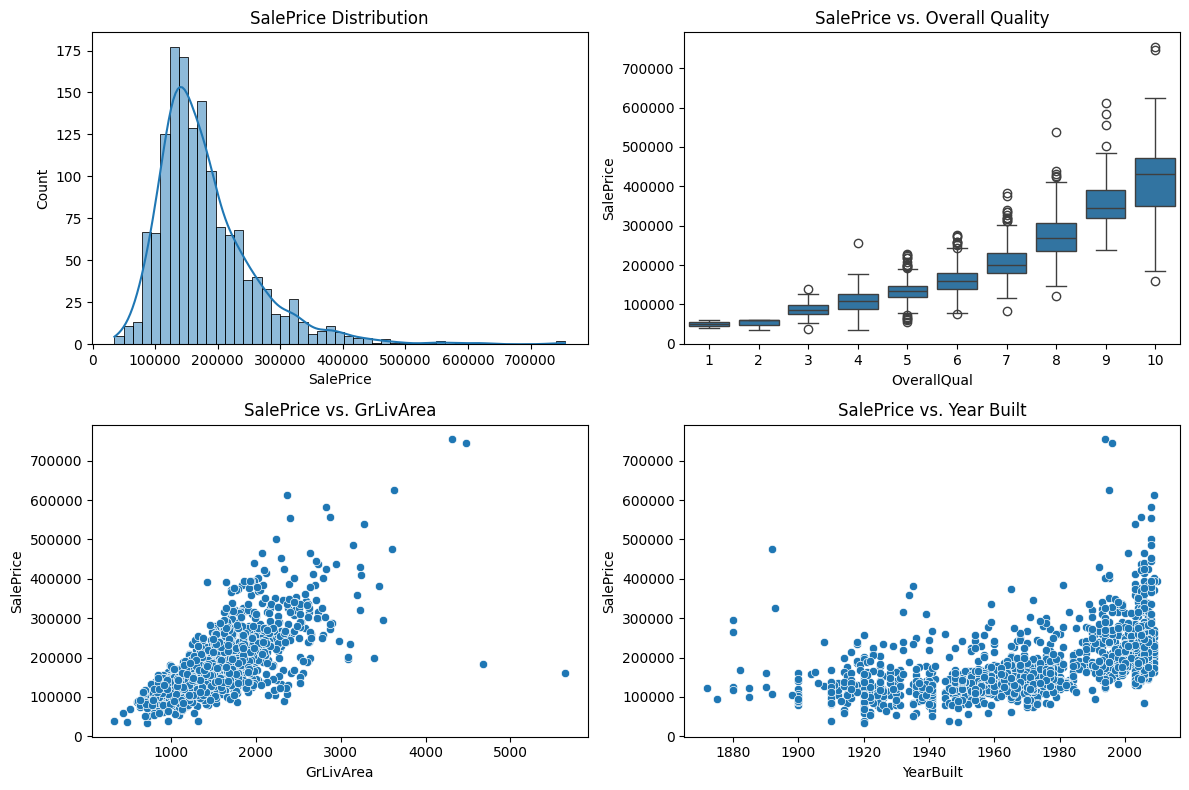

In [ ]:
# Setting up the matplotlib figure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# SalePrice Distribution
sns.histplot(train_data["SalePrice"], kde=True, ax=axs[0, 0])
axs[0, 0].set_title("SalePrice Distribution")

# Overall Quality vs. SalePrice
sns.boxplot(x="OverallQual", y="SalePrice", data=train_data, ax=axs[0, 1])
axs[0, 1].set_title("SalePrice vs. Overall Quality")

# Above Grade (Ground) Living Area Square Feet vs. SalePrice
sns.scatterplot(x="GrLivArea", y="SalePrice", data=train_data, ax=axs[1, 0])
axs[1, 0].set_title("SalePrice vs. GrLivArea")

# Year Built vs. SalePrice
sns.scatterplot(x="YearBuilt", y="SalePrice", data=train_data, ax=axs[1, 1])
axs[1, 1].set_title("SalePrice vs. Year Built")

plt.tight_layout()
plt.show()


* SalePrice Distribution: The distribution of "SalePrice" is right skewed, suggesting that most houses are in the lower price range, with few houses going in the higher range.

* SalePrice vs Overall Quality: A positive relationship exists between "OveallQual" and "SalePrice" suggesting higher quality houses tends to sell for higher price. There is a strong linear relationship making "OverallQual" a good predictor for "SalePrice".

* SalePrice vs GrLivArea: There is a positive correlation between "GrLivArea" and "SalePrice" suggesting that as the living area increases the sale price tends to increase as well. However, few outliers are present observed from the scatter plot as some house with large living areas have relatively low prices.

* SalePrice vs YearBuilt: There is a slight trend where newer houses tend to sell at higher price, but the relationship is not as stong as with "OverallQual" or "GrLivArea". Some older houses also has higher sale price, possibly due to historical value or other desirable features.

#Analysis

##Stratified Sampling

To begin the anlysis section, we wanted to compare the use of a stratified sampling procedure to a simple random sample (SRS), to estimate the mean sales price. We stratified the housing data based on the variable 'BldgType', which represents the type of house, such as single family, townhouse, etc. This stratification variable was chosen in an attempt to decrease the relative ratio of variance within- to between-strata. As there is logically a difference in value between the various housing types, we hypothesized that this would translate in to a greater variance between strata and imporve the estimates from the stratified samples.
We created random samples composed of 20% of the original population. For the stratified sample, we sampled each strata in proportion to its occurence within the population.

In [ ]:
strat_pop = train_data[['SalePrice', 'BldgType']].groupby("BldgType").agg(["count", "mean", "var"]).SalePrice

simple_sample = train_data['SalePrice'].sample(frac=0.2, random_state=100)
strat_sample = train_data[['SalePrice', 'BldgType']].groupby("BldgType").sample(frac=0.2, random_state=100)
strat_sample = strat_sample.groupby("BldgType").agg(["count", "mean", "var"]).SalePrice


Text(0.5, 1.0, 'Distribution of total variance by home type')

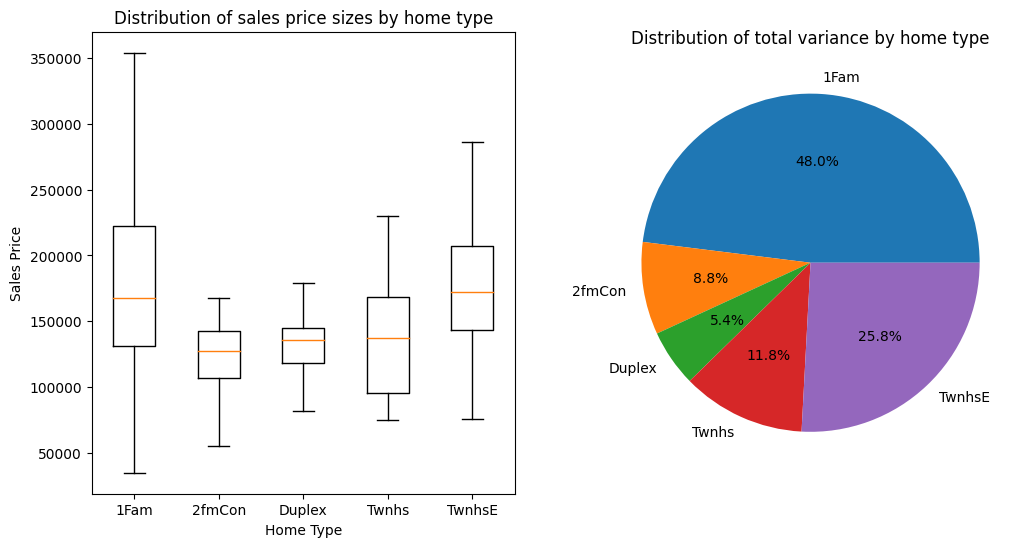

In [ ]:
strat = [train_data.SalePrice[train_data.BldgType == type] for type, _ in strat_pop.iterrows()]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1.boxplot(strat, showfliers=False)
ax1.set_ylabel("Sales Price")
ax1.set_xlabel("Home Type")
ax1.set_xticklabels(strat_pop.index)
ax1.set_title("Distribution of sales price sizes by home type")

ax2.pie(strat_pop["var"], labels = strat_pop.index, autopct='%1.1f%%')
ax2.set_title("Distribution of total variance by home type")

In [ ]:
import numpy as np
#Stratified Sample
#Estimate mean
N = strat_pop['count'].sum()
Nh = strat_pop['count']
nh = strat_sample['count']
strat_mean = strat_sample['mean']
strat_var = strat_sample['var']
noreplace_adj = 1-(nh/Nh)
strat_popmean_est = (Nh/N * strat_mean).sum()

#Calculate standard error
strat_varmean = ((strat_var/nh) * (Nh/N)**2 * noreplace_adj).sum()
strat_se = np.sqrt(strat_varmean)

#95% Confidence Intervals
lower_strat_ci = strat_popmean_est - 1.96 * strat_se
upper_strat_ci = strat_popmean_est + 1.96 * strat_se

true_mean = train_data['SalePrice'].mean()

print(f"The 95% confidence intervals for the stratified sample estimate of the population mean range from {lower_strat_ci:.2f} to {upper_strat_ci:.2f}.")
print(f"The true mean sale price value was {true_mean:.2f}.")

The 95% confidence intervals for the stratified sample estimate of the population mean range from 178267.32 to 195193.81.
The true mean sale price value was 180921.20.


In [ ]:
#Simple random sample
#Estimate mean and calculate standard error
simple_popmean_est = simple_sample.mean()
simple_se = simple_sample.std()/np.sqrt(len(simple_sample))

#95% Confidence Intervals
lower_simple_ci = simple_popmean_est - 1.96 * simple_se
upper_simple_ci =simple_popmean_est + 1.96 * simple_se

print(f"The 95% confidence intervals for the SRS estimate of the population mean range from {lower_simple_ci:.2f} to {upper_simple_ci:.2f}.")
print(f"The true mean sale price value was {true_mean:.2f}.")

The 95% confidence intervals for the SRS estimate of the population mean range from 172904.46 to 191329.75.
The true mean sale price value was 180921.20.


In [ ]:
ci_ratio = (upper_strat_ci - lower_strat_ci)/(upper_simple_ci - lower_simple_ci)

print(f"The 95% confidence intervals for stratified sample CIs are {ci_ratio * 100:.2f}% as wide as those of the SRS.")

The 95% confidence intervals for stratified sample CIs are 91.87% as wide as those of the SRS.


After stratifying the data, we found that just under half of the total Sale Price variation could be attributed to single family homes. We additionally found that both sampling procedures were accurate, in that both of the confidence intervals captured the true mean sale price. However, the stratified sampling method produced confidence intervals that were roughly 10% smaller, indicating an increase in the precision of the estimate. The change in precision is highly dependent upon the variables upon which stratification occurs, and could potentially be further improved by including more/better stratification variables.

## Linear Regression


We then set out to model the Sale Price as a linear function of a set of the available predictor variables. As the sci-kit learn module necessitates the use of binary operators to represent categorical variables, the first step was to create dummy variables. A binary dummy variable was created for each level of all of the categorical variables. This resulted in a total of 304 predictor variables. Following the creation of dummy variables, we additionally split the dataset 4 to 1 into training and testing sets, respectively.
We then created an inital linear model containing all of the avaailable variables. This 'full' model was to act as a benchmark to which later forms of the linear model could be compared. We calculated a Root Mean Squared Error (RMSE) value for the linear model. We chose to use RMSE, as it provides insight into both the accuracy and precision of a model.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score

In [ ]:
#Add dummy variables (sklearn requires new boolean col for each level of a factor)
train_data_dum = (pd.get_dummies(train_data))

#Create training and testing datasets
x = train_data_dum.loc[:, train_data_dum.columns != 'SalePrice']
y = train_data_dum['SalePrice']

x_tr, x_val, y_tr, y_val = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
#Inital linear model with all variables
model = LinearRegression()
mse_val = np.mean(cross_val_score(model, x_tr, y_tr, cv=5, scoring='neg_mean_squared_error'))
print(f"""The RMSE value of the full linear model: ${np.sqrt(abs((mse_val))):.2f}""")

The RMSE value of the full linear model: $38281.80


###Feature Selection

The benchmark RMSE from the full linear model was found to be $38,281.90. The next step was to determine the best set of predictors from the 304 variables contained in the dataset. In addition to minimizing the RMSE, we also wanted to substantially reduce the number of variables in the linear model. With these objectives in mind, we sequentially dropped the 15 least significant variables (determined by univariate f tests) and calculated a five-fold cross-validated RMSE value for each iterative step. The RMSE values were then plotted relative to the number of features in the model to visualize the optimal model size.

In [ ]:
start_n = 300
step = 15
pvals = f_regression(x_tr,y_tr)[1]

n_features = []
rmse = []
name_features = []

#Loop to iteratively drop the 15 variables with the highest univariate p-values
#At each iteration, a RMSE score is calculated through a cross-validated fitting of a linear model to the remianing variables
for i in range(start_n//step):
  n_col = start_n - i*step
  drop_top_mask = np.argpartition(pvals, n_col)[:n_col]
  x_tr_i = x_tr.iloc[:,drop_top_mask]
  model = LinearRegression()
  mse_val = np.mean(cross_val_score(model, x_tr_i, y_tr, cv=5, scoring='neg_mean_squared_error'))

  rmse.append(np.sqrt(abs((mse_val))))
  n_features.append(n_col)
  name_features.append(x_tr_i.columns)


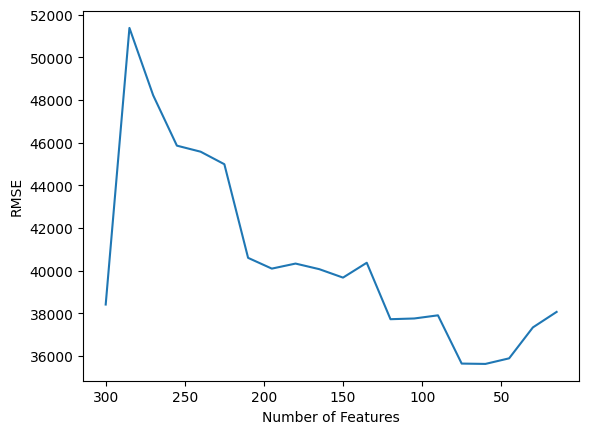

In [ ]:
plt.plot(n_features, rmse)
plt.gca().invert_xaxis()
plt.xlabel("Number of Features")
plt.ylabel("RMSE");

In terms of RMSE, the linear model appears to improve when the feature space is defined by predictor variables with the 80th to 25th lowest overall univariate p-values. For further resolution within this feature space, we repeated the feature selection analysis within this range. However, we dropped only one variable during each iteration.

In [ ]:
start_n = 85
step = 1
pvals = f_regression(x_tr,y_tr)[1]

n_features = []
rmse = []
name_features = []

#Loop to iteratively drop the single variables with the highest univariate p-values
#At each iteration, a RMSE score is calculated through a cross-validated fitting of a linear model to the remianing variables
for i in range(start_n//step-20):
  n_col = start_n - i*step
  drop_top_mask = np.argpartition(pvals, n_col)[:n_col]
  x_tr_i = x_tr.iloc[:,drop_top_mask]
  model = LinearRegression()
  mse_val = np.mean(cross_val_score(model, x_tr_i, y_tr, cv=5, scoring='neg_mean_squared_error'))

  rmse.append(np.sqrt(abs((mse_val))))
  n_features.append(n_col)
  name_features.append(x_tr_i.columns)

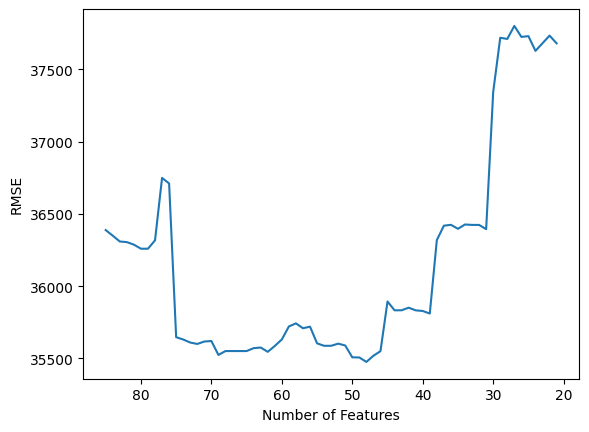

In [ ]:
plt.plot(n_features, rmse)
plt.gca().invert_xaxis()
plt.xlabel("Number of Features")
plt.ylabel("RMSE");

In [ ]:
min_index = np.argmin(rmse)
n_features[min_index]

48

In [ ]:
#New set of x variables consisting of the 48 lowest univariate p-values
feature_mask = name_features[min_index]
x_tr_linear = x_tr[feature_mask]

We found that the cross-validated RMSE was minimzed when the linear regression model conssited of predictors that had the 48 lowest univariate p-values. We used only this sett of variables for the further processing steps.

###Higher Order Relationships
Following the above feature selection, we then wanted to look for any higher order relationships. To do this, we isolated all the numeric variables within the selected feature space. For each numeric variable, we fit a linear model with that variable represented as a quadratic term alongside all the other 48 predictor variables. Again, the model was assessed with a RMSE from a five-fold cross-validation procedure. We then plotted each of the models (defined by the feature that was squared) relative to the associated cross-validated RMSE score.

In [ ]:
#Assess each numeric variable at the quadratic level
x_num_col = numerical_columns_train[0:-1]
numeric_feature_mask = np.isin(x_num_col, feature_mask)
x_num_col = x_num_col[numeric_feature_mask]

rmse_vals = []
x_var_squared = []

#iteratively build model with squared numeric variables
for col in x_num_col:
  #fit model
  x_tr_var2 = (x_tr_linear[col]**2)
  x_tr_var2.name = x_tr_linear[col].name + "2"
  x_tr2 = x_tr_linear.join(x_tr_var2)

  model = LinearRegression()
  mse_val = np.mean(cross_val_score(model, x_tr2, y_tr, cv=5, scoring='neg_mean_squared_error'))
  rmse_vals.append(np.sqrt(abs(mse_val)))
  x_var_squared.append(col)

quadratic_df = pd.DataFrame({"variable":x_var_squared,"rmse":rmse_vals})

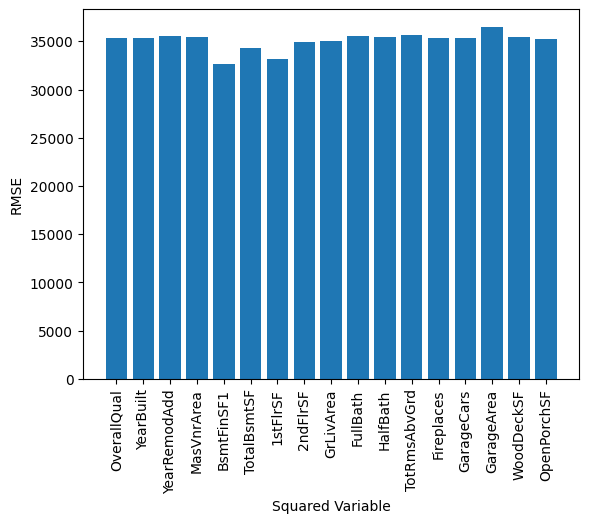

In [ ]:
plt.bar(quadratic_df['variable'], quadratic_df['rmse'])
plt.xticks(rotation=90)
plt.xlabel("Squared Variable")
plt.ylabel("RMSE");

We found that the inclusion of a quadratic representation of 'BsmtFinSF1' and '1stFlrSF' results in a slight decrease of the RMSE. However, we decided that the small reduction in the RMSE did not justify the added complexity brought on by higher order terms. For this reason, we decided to use the 48 feature model without any higher order terms as the final linear model.

###Model Assumptions


Following the confirmation of our final model, we set out to assess the models validity. Specifically, we wanted to examine the homoscedasticity, linearity, normality, and independecne assumptions. We started out byb plotting the residuals of the predicted Sales Price relative to the actual Sales Price.

In [ ]:
model = LinearRegression()
model.fit(x_tr_linear, y_tr)
predictions = model.predict(x_tr_linear)
residuals = abs(y_tr) - abs(predictions)
df_resid = pd.DataFrame({'predictions': predictions, 'actual': y_tr, 'residuals': residuals})

df_resid.sort_values(by = 'actual',inplace = True)
#line_coords = np.arange(df_results.min().min(), df_results.max().max())

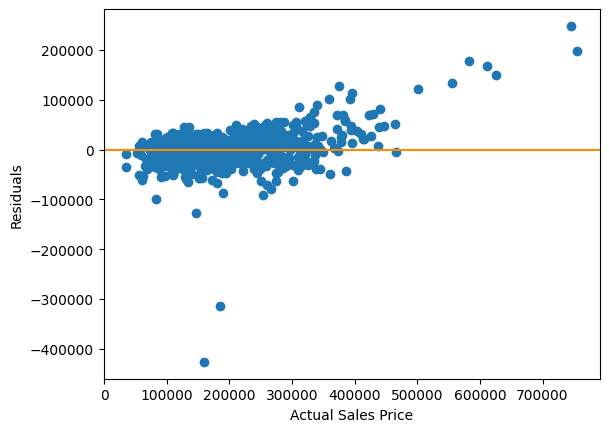

In [ ]:
plt.scatter(df_resid['actual'], df_resid['residuals'])
plt.xlabel("Actual Sales Price")
plt.ylabel("Residuals")
plt.axhline(0, color='darkorange')

The results show a general clustering of residuals around actual Sales Price, when the actual Sale Price is low. However, there is a clear pattern wherein the magnitude of the residuals increases in the positive direction for higher actual Sales Price. Based on this, it does not appear that the linear model meets the homoscedasticity assumption. To further quantify these results, we conducted a Breusch-Pagan test.

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.api as sm

x_ols = sm.add_constant(x_tr_linear)
model = sm.OLS(y_tr,x_ols)
results = model.fit()
bp_test = sms.het_breuschpagan(results.resid, results.model.exog)

names = ['Lagrange multiplier statistic',
         'p-value',
         'f-value',
         'f p-value']

lzip(names, bp_test)

#The bp test indicates that model fails the homoscedasticity assumption

[('Lagrange multiplier statistic', 529.6009866189323),
 ('p-value', 2.2518373121511323e-82),
 ('f-value', 19.768637741510705),
 ('f p-value', 4.827658011342691e-115)]

This low p-value of the Bresch-Pagan test confirmed our suspicion that the  linear model does not meet the assumption of homoscedasticity. Additionally, it appears unlikely that the model would meet the multicollinearity and normality requirements. Additionally, many of the predictor variables can not be said to be independent (e.g. lot frontage and lot area). Nevertheless, we decided to proceed to the model testing stage in order to obtain an approximation of the predictive capabilities of a linear model.


###Model Testing
To test the accuracy and precision of the final model, we fit the selected model with all available training data nad assessed it against the withheld testing data. We calculated corresponding RMSE and R^2 values.

In [ ]:
col_mask = x_tr_linear.columns
x_val_linear = x_val[col_mask]

model = LinearRegression()
model.fit(x_tr_linear, y_tr)
y_hat = model.predict(x_val_linear)

rmse_val = np.sqrt(mean_squared_error(y_val, y_hat))
r2 = model.score(x_tr_linear, y_tr)

print(f"""RMSE: {rmse_val:.2f}""")
print(f"""R^2: {r2:.2f}""")

RMSE: 31539.07
R^2: 0.84


We found that the resulting RMSE value of $31,539.07 was about 20% lower than that of the full model. This indicates that our selection of variables appears to have increased both the precision and accuracy of the model. However, the lack of validity indicates that the results in this study should not be generalized.

## Decision Tree Regression

The decision tree is a simple machine learning model for getting started with regression tasks.

Background A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node. (see here for more details).

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
#Converting all the non numeric data in train_data to numeric data for training using Labelencoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through each column in train_data
for col in train_data.columns:
    # Check if the column dtype is object (non-numeric)
    if train_data[col].dtype == 'object':
        # Fit label encoder and transform values for the column
        train_data[col] = label_encoder.fit_transform(train_data[col])

# Display the modified train_data
print(train_data.head())


In [ ]:
#Plot a correlation heatmap to see where correlation exist
plt.figure(figsize=(30,8))
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)
plt.show()

## Applying Decision tree Regressor On the entire Train **Data**

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
train_data1=train_data
X_train, X_test, y_train, y_test = train_test_split(train_data1.drop('SalePrice', axis=1), train_data1['SalePrice'], test_size=0.3, random_state=100)

# we are going to scale to data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

### Creating and Training the model
from sklearn.tree import DecisionTreeRegressor
dtreg1 = DecisionTreeRegressor (random_state=100)
dtreg1.fit(X_train, y_train)


### Predictions from our Model

In [ ]:
dtr_pred1 = dtreg1.predict(X_test)
dtr_pred1 = dtr_pred1.reshape(-1,1)

### Regression Evaluation Metrics

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Absolute error is:", metrics.mean_absolute_error(y_test, dtr_pred1))
print("Mean Squared Error is:", metrics.mean_squared_error(y_test, dtr_pred1))
print("The RMSE values is:", np.sqrt(metrics.mean_squared_error(y_test, dtr_pred1)))
print("R-squared (R^2) score:", r2_score(y_test, dtr_pred1))

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, dtr_pred1,c="lightblue")
plt.xlabel("y_test")
plt.ylabel("Predicted y")
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the number of folds
k_folds = 5

# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize an empty list to store the mean squared errors for each fold
mse_scores = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the model
    dtreg_fold = DecisionTreeRegressor(random_state=100)
    dtreg_fold.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred_fold = dtreg_fold.predict(X_val_fold)

    # Calculate mean squared error for this fold
    mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
    mse_scores.append(mse_fold)

# Calculate the average mean squared error across all folds
avg_mse = np.mean(mse_scores)
print("Average Mean Squared Error across", k_folds, "folds:", avg_mse)

# Decision tree using only >0.5 correlation score features

First Lets find the features with >0.5 correlation

In [ ]:
corr=train_data.corr()
corr[corr['SalePrice']>0.5].index

In [ ]:
#Dropping columns less than 0.5 correlation with SalePrice
train_data2=train_data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice']]
#Plot a correlation heatmap to see where correlation exist of selected features of train_data
plt.figure(figsize=(30,15))
sns.heatmap(train_data2.corr(), cmap='viridis', annot=True)
plt.show()

#### Using Decision tree regressor for training the model with only 11 features

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(train_data2.drop('SalePrice', axis=1), train_data2['SalePrice'], test_size=0.3, random_state=100)

# we are going to scale to data
y1_train= y1_train.values.reshape(-1,1)
y1_test= y1_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
sc_y1 = StandardScaler()
X1_train = sc_X1.fit_transform(X1_train)
X1_test = sc_X1.fit_transform(X1_test)
y1_train = sc_X1.fit_transform(y1_train)
y1_test = sc_y1.fit_transform(y1_test)

from sklearn.tree import DecisionTreeRegressor
dtreg2 = DecisionTreeRegressor (random_state=100)
dtreg2.fit(X1_train, y1_train)

dtr_pred2 = dtreg2.predict(X1_test)
dtr_pred2 = dtr_pred2.reshape(-1,1)
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Absolute error is:", metrics.mean_absolute_error(y1_test, dtr_pred2))
print("Mean Squared Error is:", metrics.mean_squared_error(y1_test, dtr_pred2))
print("The RMSE values is:", np.sqrt(metrics.mean_squared_error(y1_test, dtr_pred2)))
print("R-squared (R^2) score:", r2_score(y1_test, dtr_pred2))

# Let's try Decision tree using the highly correlated features >0.70

### Decision tree model using only OverallQual and GrLivArea (as per correlation matrix >0.70) since they had the best correlation with saleprice

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Selecting only the features "OverallQual" and "GrLivArea"
X2_train = train_data[['OverallQual', 'GrLivArea']]
y2_train = train_data['SalePrice']

# Splitting the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_train, y2_train, test_size=0.3, random_state=100)

# we are going to scale to data
y2_train= y2_train.values.reshape(-1,1)
y2_test= y2_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X2 = StandardScaler()
sc_y2 = StandardScaler()
X2_train = sc_X2.fit_transform(X2_train)
X2_test = sc_X2.fit_transform(X2_test)
y2_train = sc_X2.fit_transform(y2_train)
y2_test = sc_y2.fit_transform(y2_test)

### Creating and Training the model
from sklearn.tree import DecisionTreeRegressor
dtreg3 = DecisionTreeRegressor (random_state=100)
dtreg3.fit(X2_train, y2_train)

dtr_pred3 = dtreg3.predict(X2_test)
dtr_pred3 = dtr_pred3.reshape(-1,1)

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Absolute error is:", metrics.mean_absolute_error(y2_test, dtr_pred3))
print("Mean Squared Error is:", metrics.mean_squared_error(y2_test, dtr_pred3))
print("The RMSE values is:", np.sqrt(metrics.mean_squared_error(y2_test, dtr_pred3)))
print("R-squared (R^2) score:", r2_score(y2_test, dtr_pred3))

I observed using the Entire training data for decision tree regressor gave the lowest Mean Absolute error is: 0.31656286926639154, Mean Squared Error is: 0.22257257669037064, The RMSE values is: 0.47177598146829247
And Highest R-squared (R^2) score: 0.7774274233096293
Hence using the entire Training data, the Predicted Home SalePrice is as follows:

In [ ]:
# Inverse transform the scaled predicted values to get the original scale
predicted_saleprice = sc_y.inverse_transform(dtr_pred1.reshape(-1, 1))
predicted_saleprice

# K-fold cross validation for model on the entire training dataset, (first model of decision tree since it was the most optimal)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the number of folds
k_folds = 5

# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize an empty list to store the mean squared errors for each fold
mse_scores = []

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the model
    dtreg_fold = DecisionTreeRegressor(random_state=100)
    dtreg_fold.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred_fold = dtreg_fold.predict(X_val_fold)

    # Calculate mean squared error for this fold
    mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
    mse_scores.append(mse_fold)

# Calculate the average mean squared error across all folds
avg_mse = np.mean(mse_scores)
print("Average Mean Squared Error across", k_folds, "folds:", avg_mse)

An average MSE of 0.28048201136964596 suggests that the decision tree regressor model performs reasonably well on this dataset, but a comparison with alternative models like Linear regression model and Random forest model may be necessary for a comprehensive evaluation.

# Calculate Model Score

Let's calculate the model score to understand how our model performed along with the explained variance score.

In [ ]:
print("Decision tree  Regression Model Score is ",round(dtreg1.score(X_test,y_test)*100))

# Random Forest Regression
* A robust ensemble technique that creates numerous decision trees during the training process.
* Designed to minimize overfitting by combining the outputs of individual trees, enhancing the model's accuracy.
* Constructs each tree using a bootstrap sample from the training data, promoting diversity within the model.
* Employs out-of-bag (OOB) samples for evaluating accuracy, eliminating the requirement for an exclusive validation set.

##Prepare Data

In [ ]:
#Add dummy variables (sklearn requires new boolean col for each level of a factor)
train_data_dum = (pd.get_dummies(train_data))
X = train_data_dum.drop([ 'SalePrice'],axis = 1)
y = train_data_dum['SalePrice']
#Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train.shape
# Initialize an empty DataFrame for results
df_reduced_RMSE_R2 = pd.DataFrame(columns=["Model", "RMSE", "R2"])


##Step 1: Model Building
Train a RandomForestRegressor with default parameters to assess baseline performance.

In [ ]:
# Step 1: Train a baseline RandomForestRegressor model
baseline_model = RandomForestRegressor(oob_score=True, random_state=10)
baseline_model.fit(X_train, y_train)
baseline_oob_score = baseline_model.oob_score_
print(f"Baseline OOB Score: {baseline_oob_score:.4f}")
#Predict and find the RMSE value
y_pred = baseline_model.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Baseline RMSE Score: {baseline_rmse:.4f}")

baseline_r2score = r2_score(y_test, y_pred)
print(f"Baseline R2 Score: {baseline_r2score:.4f}")
# Add results to the DataFrame
new_row = {"Model": "Baseline", "RMSE": baseline_rmse, "R2": baseline_r2score}
df_reduced_RMSE_R2 =  df_reduced_RMSE_R2.append(new_row, ignore_index=True)


##Step 2: Hyperparameter Tuning

With our baseline model established, the next step involves fine-tuning the hyperparameters

In [ ]:
# Step 2: Train a  RandomForestRegressor model with hyper parameter tuning (Manually trying)
manual_model = RandomForestRegressor(oob_score=True, criterion='squared_error', random_state = 13)
manual_model.fit(X_train, y_train)
manual_oob_score = manual_model.oob_score_
print(f"Manual HyperParameter tuning OOB Score: {manual_oob_score:.4f}")
#Predict and find the RMSE value
y_pred = manual_model.predict(X_test)
manual_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Manual HyperParameter tuning  RMSE Score: {manual_rmse:.4f}")

manual_r2score = r2_score(y_test, y_pred)
print(f"Manual HyperParameter tuning  R2 Score: {manual_r2score:.4f}")

# Add results to the DataFrame
new_row = {"Model": "Manual HyperParameter Tuning", "RMSE": manual_rmse, "R2": manual_r2score}
df_reduced_RMSE_R2 =  df_reduced_RMSE_R2.append(new_row, ignore_index=True)

Use RandomizedSearchCV to find the optimal hyperparameters for your RandomForestRegressor.

In [ ]:
# Define parameter grid for RandomizedSearchCV
param_grid = {
              'n_estimators': [100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_features': ['auto', 'sqrt',1.0],
              'criterion':['squared_error']
              }

# Initialize RandomizedSearchCV
search_model =  RandomizedSearchCV(
                            estimator=RandomForestRegressor(random_state=42),
                            param_distributions=param_grid,
                            cv=5,
                            scoring='neg_mean_squared_error',
                            n_jobs=-1
                            )


search_model.fit(X_train, y_train)

In [ ]:
#Predict and find the RMSE value
y_pred = search_model.predict(X_test)
search_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Grid Search HyperParameter tuning  RMSE Score: {search_rmse:.4f}")

search_r2score = r2_score(y_test, y_pred)
print(f"Grid Search HyperParameter tuning  R2 Score: {search_r2score}")

# Add results to the DataFrame
new_row = {"Model": "GridSearchCV", "RMSE": search_rmse, "R2": search_r2score}
df_reduced_RMSE_R2 =  df_reduced_RMSE_R2.append(new_row, ignore_index=True)

##Step 3: Feature Importance
Feature importance in machine learning models refers to techniques or methods used to understand the significance or contribution of input variables to the model's predictions. It helps in identifying which features have the most influence on the predicted outcomes, allowing for a better understanding of the data's underlying structure and the model's behavior.
So our motive is to nnalyze feature importance, remove non-influential features, and refine  model.

In [ ]:
#Evaluate feature importance for all features
#best_model = search_model.best_estimator_
best_model = manual_model
feature_importances = best_model.feature_importances_

features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
features = features[features['Importance'] > 0]
num_features = len(features["Importance"])
features

In [ ]:


# Creating the bar plot to show the selected features and their importance
plt.figure(figsize=(20, 6))
plt.bar(features['Feature'], features['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f"Feature Importance for  {num_features} features")
plt.xticks(rotation=90,fontsize = 5)
plt.show()

## Selecting top features with cumulative Importance as 95%

In [ ]:
# Calculating cumulative sum of 'importance'
features['cum_importance'] = features['Importance'].cumsum()

# Selecting rows where 'cum_importance' is up to 0.95
selected_features_95 = features[features['cum_importance'] <= 0.95]
num_selected_features_95 = len(selected_features_95.Feature)
print(f"Number of selected Features with 95% cumulative importance is {num_selected_features_95}")
selected_features_95.head()

In [ ]:

# Creating the bar plot to show the selected features and their importance
plt.figure(figsize=(20, 6))
plt.bar(selected_features_95['Feature'], selected_features_95['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f"Feature Importance for selected {num_selected_features_95} features with cumulative 95% importance")
plt.xticks(rotation=90)
plt.show()

## Selecting top features with cumulative Importance as 90%

In [ ]:


# Selecting rows where 'cum_importance' is up to 0.90
selected_features_90 = features[features['cum_importance'] <= 0.90]
num_selected_features_90 = len(selected_features_90.Feature)
print(f"Number of selected Features with 90% cumulative importance is {num_selected_features_90}")
selected_features_90.head()

In [ ]:
# Creating the bar plot to show the selected features and their importance
plt.figure(figsize=(20, 6))
plt.bar(selected_features_90['Feature'], selected_features_90['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f"Feature Importance for selected {num_selected_features_90} features with cumulative 90% importance")
plt.xticks(rotation=90)
plt.show()

## Selecting top 10 features

In [ ]:
#Lastly we check the top 10 features
selected_features_top_10 = features.head(10)

# Creating the bar plot to show the selected features and their importance
plt.figure(figsize=(20, 6))
plt.bar(selected_features_top_10['Feature'], selected_features_top_10['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f"Feature Importance for selected top 10 features ")
plt.xticks(rotation=90)
plt.show()


## Step 4:Compare the Models

Next step is to compare the model and find the best one to predict teh salesprice


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def train_evaluate_model(X_train, X_test, y_train, y_test, features, model_name, results_df):
    # Reduce training and testing sets to selected features
    X_train_reduced = X_train[features]
    X_test_reduced = X_test[features]

    # Initialize and train the RandomForestRegressor model
    model = RandomForestRegressor(oob_score=True, criterion='squared_error', random_state=14)
    model.fit(X_train_reduced, y_train)

    # Evaluate the model
    oob_score = model.oob_score_
    y_pred = model.predict(X_test_reduced)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2score = r2_score(y_test, y_pred)

    # Print performance metrics
    #print(f"{model_name} - OOB Score: {oob_score:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2score:.4f}")

    # Add results to the DataFrame
    new_row = {"Model": model_name, "RMSE": rmse, "R2": r2score}
    results_df = results_df.append(new_row, ignore_index=True)

    return results_df


# Define feature sets
features_95 = selected_features_95['Feature'].tolist()
features_90 = selected_features_90['Feature'].tolist()
features_top_10 = selected_features_top_10['Feature'].tolist()

# Train and evaluate models
df_reduced_RMSE_R2 = train_evaluate_model(X_train, X_test, y_train, y_test, features_95, "95% Importance", df_reduced_RMSE_R2)
df_reduced_RMSE_R2 = train_evaluate_model(X_train, X_test, y_train, y_test, features_90, "90% Importance", df_reduced_RMSE_R2)
df_reduced_RMSE_R2 = train_evaluate_model(X_train, X_test, y_train, y_test, features_top_10, "Top 10 Features", df_reduced_RMSE_R2)


In [ ]:
df_reduced_RMSE_R2

10 fold Cross Validation Score

In [ ]:
print("Baseline Model")
scores_rfr = cross_val_score(baseline_model,X_train,y_train,cv=10,scoring='explained_variance')
#print('explained variance scores for k=10 fold validation:\n',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))

In [ ]:
print("Manual hyper parameter Tuning Model")
scores_rfr = cross_val_score(manual_model,X_train,y_train,cv=10,scoring='explained_variance')
#print('explained variance scores for k=10 fold validation:\n',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))

In [ ]:
print("Grid search Model")
scores_rfr = cross_val_score(search_model,X_train,y_train,cv=10,scoring='explained_variance')
#print('explained variance scores for k=10 fold validation:\n',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))

In [ ]:
print("Reduced  Model")
scores_rfr = cross_val_score(reduced_model,X_train_reduced,y_train,cv=10,scoring='explained_variance')
#print('explained variance scores for k=10 fold validation:\n',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))

# Conclusion

Performance of three different regression models:  
1. Linear Regression
2. Decision Tree
3. Random Forest

Based on two key metrics:
* Root Mean Square Error (RMSE)
*  coefficient of determination (R² score).

The extremely high RMSE for the Decision Tree model suggests that the model's predictions are, on average, 217254.63 units away from the actual values. This indicates a poor model fit to the data. The RMSE is lower than that of Linear Regression, indicating that the Random Forest model has a tighter fit to the data and, on average, makes errors that are smaller in magnitude.
For Random Forest , R2 score is the highest among the three models, suggesting that about 88% of the variance in the target variable is predictable from the features. This implies that the Random Forest model has the highest explanatory power and is the most accurate in predicting the target variable.